In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [58]:
df = pd.read_csv("advertising.csv")

In [59]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [60]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [62]:
df.shape

(200, 4)

In [63]:
df.size

800

In [64]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [65]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [66]:
df.duplicated().any()

False

### Check for outlier

There are no outlier present

In [67]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [107]:
import seaborn as sns

####  Heatmap

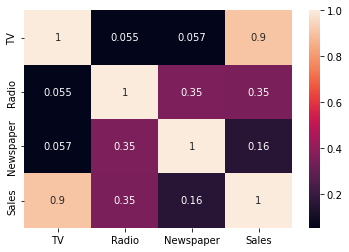

In [69]:
sns.heatmap(df.corr(),annot= True)
plt.show()

### EDA

#### Distribution 

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


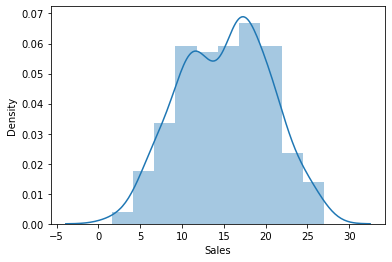

In [70]:
sns.distplot(df['Sales']);

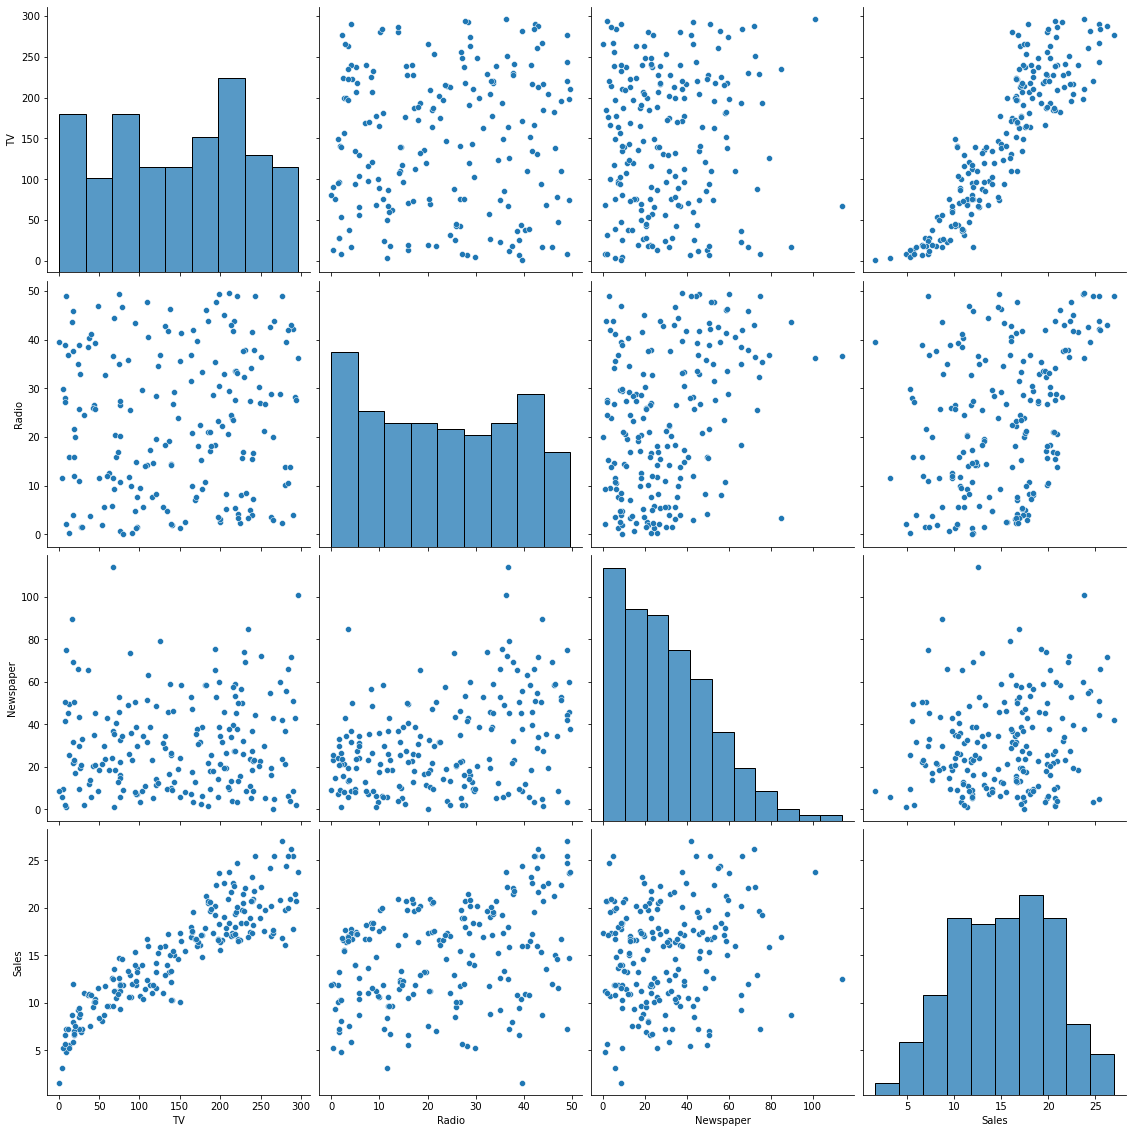

In [71]:
sns.pairplot(df, height=4, aspect=1, kind='scatter')
plt.show()

####  Model Building

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [73]:
# step -1 = select the  dependent and independent  variables (i.e x and y)
x = df['TV'].values.reshape(-1,1)
X = df[['TV']]
y = df['Sales']

In [74]:
# step -2 = Bifrucation of data into train and test data.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state =100)

In [75]:
# step -3 = Model Instantiation
slr= LinearRegression()

In [76]:
# step- 4 = fit the model with train data 

slr.fit(x_train,y_train)

LinearRegression()

In [77]:
#### Printing the model coff.
print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

Intercept:  6.948683200001357
Coefficient: [0.05454575]


In [78]:
print('Regression Equation: Sales = 6.948 + 0.054 * TV')

Regression Equation: Sales = 6.948 + 0.054 * TV


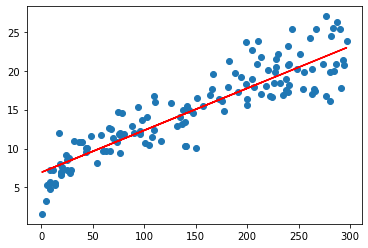

In [79]:
#Line of best fit
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

In [80]:
# Prediction of test and training set result
y_pred_slr= slr.predict(x_test)  
x_pred_slr= slr.predict(x_train)  


In [81]:
print(y_test[::])

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
167    17.2
116    12.2
96     16.7
52     22.6
69     22.3
164    11.9
124    19.7
182     8.7
154    20.6
125    10.6
196    14.0
194    17.3
177    16.7
163    18.0
31     11.9
11     17.4
73     11.0
15     22.4
41     17.1
97     20.5
128    24.7
133    19.6
82     11.3
139    20.7
123    15.2
83     13.6
65     11.3
151    11.6
162    19.9
170     8.4
77     14.2
32     13.2
173    16.7
174    16.5
85     20.2
168    17.1
112    17.1
171    17.5
181    17.2
7      13.2
46     10.6
75      8.7
28     18.9
29     10.5
195     7.6
40     16.6
153    16.0
115    12.6
64     16.0
59     18.4
1      10.4
192     5.9
136     9.5
152    16.6
161    13.3
Name: Sales, dtype: float64


In [82]:
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.37414007 19.94148154 14.32326899 18.82329361 20.13239168 18.2287449
 14.54145201 17.72692398 18.75238413 18.77420243 13.34144544 19.46693349
 10.01415451 17.1923756  11.70507285 12.08689312 15.11418241 16.23237035
 15.8669138  13.1068987  18.65965635 14.00690363 17.60692332 16.60328147
 17.03419291 18.96511257 18.93783969 11.05597839 17.03419291 13.66326538
 10.6796127  10.71234015 13.5487193  17.22510305  9.67597085 13.52144643
 12.25053038 16.13418799 19.07965865 17.48692266 18.69783838 16.53237199
 15.92145955 18.86693021 13.5050827  11.84143724  7.87050642 20.51966653
 10.79961336  9.03233096 17.99419817 16.29237067 11.04506924 14.09963141
 18.44147334  9.3759692   7.88687015  8.34505447 17.72692398 11.62325422]


In [83]:
#Actual value and the predicted value
slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
slr_diff

,Actual value,Predicted value
126,6.6,7.374140
104,20.7,19.941482
99,17.2,14.323269
92,19.4,18.823294
111,21.8,20.132392
167,17.2,18.228745
116,12.2,14.541452
96,16.7,17.726924
52,22.6,18.752384
69,22.3,18.774202


In [84]:
from sklearn.metrics import r2_score
y_test_pred= slr.predict(x_test)
y_train_pred=  slr.predict(x_train)
a = r2_score(y_train,y_train_pred)
b= r2_score(y_test, y_test_pred)
print('training = {} testing = {}'.format(a,b))

training = 0.8157933136480389 testing = 0.7921031601245662


In [85]:
a= slr.score(x_train, y_train)
b= slr.score(x_test, y_test)
print('testing ={} testing={}'.format(a,b))

testing =0.8157933136480389 testing=0.7921031601245662


#### Check Error

In [86]:
meanAbErr = metrics.mean_absolute_error(y_test,y_test_pred)
meanSqErr = metrics.mean_squared_error(y_test,y_test_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

print('Mean Absolute Error:' , meanAbErr)
print('Mean Squared Error:' , meanSqErr)
print('Root  Mean Squared Error:' ,rootMeanSqErr)
                    

Mean Absolute Error: 1.6480589869746527
Mean Squared Error: 4.077556371826949
Root  Mean Squared Error: 2.019296008966231


#### Multiple Regression

In [87]:
#Setting the value for X and Y
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [88]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=100)  

In [89]:
mlr= LinearRegression()  
mlr.fit(x_train, y_train) 

LinearRegression()

In [90]:
print(mlr.intercept_)


4.334595861728431


In [91]:
list(zip(x , mlr.coef_))

[('TV', 0.053829108667250075),
 ('Radio', 0.11001224388558054),
 ('Newspaper', 0.006289950146130339)]

In [92]:
y_pred_mlr = mlr.predict(x_test)

In [93]:
y_pred_mlr

array([ 9.35221067, 20.96344625, 16.48851064, 20.10971005, 21.67148354,
       16.16054424, 13.5618056 , 15.39338129, 20.81980757, 21.00537077,
       12.29451311, 20.70848608,  8.17367308, 16.82471534, 10.48954832,
        9.99530649, 16.34698901, 14.5758119 , 17.23065133, 12.56890735,
       18.55715915, 12.12402775, 20.43312609, 17.78017811, 16.73623408,
       21.60387629, 20.13532087, 10.82559967, 19.12782848, 14.84537816,
       13.13597397,  9.07757918, 12.07834143, 16.62824427,  8.41792841,
       14.0456697 ,  9.92050209, 14.26101605, 16.76262961, 17.17185467,
       18.88797595, 15.50165469, 15.78688377, 16.86266686, 13.03405813,
       10.47673934, 10.6141644 , 20.85264977, 10.1517568 ,  6.88471443,
       17.88702583, 18.16013938, 12.55907083, 16.28189561, 18.98024679,
       11.33714913,  5.91026916, 10.06159509, 17.62383031, 13.19628335])

In [94]:
# Predict for any value
mlr.predict([[56, 55,67]])

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.82112602])

In [95]:
from sklearn.metrics import r2_score
y_test_pred= mlr.predict(x_test)
y_train_pred=  mlr.predict(x_train)

a = r2_score(y_train,y_train_pred)
b= r2_score(y_test, y_test_pred)
print('training = {} testing = {}'.format(a,b))

training = 0.91049938193816 testing = 0.8655979373420272


####  Data Standardization

In [96]:
X = df.drop('TV',axis=1)
y= df['TV']
X.shape

(200, 3)

#### Cross Validation

In [97]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.2,random_state=42)

In [99]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test)

In [100]:
reg.score(X_test, y_test)

0.8914835247814323

In [101]:
from sklearn import metrics
print("R score",metrics.r2_score(y_test,Reg_predict))
print("MSE = ", metrics.mean_squared_error(y_test,Reg_predict))

R score 0.8914835247814323
MSE =  886.0620087909356


#### L1(Lasso) and L2(Ridge) Reg.

#### Using L1 REG

In [102]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [103]:
lasso_reg.score(X_test,y_test)

0.8911398015539903

In [104]:
lasso_reg.score(X_train,y_train)

0.8866879383984567

#### Using L2 REG

In [105]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [106]:
ridge_reg.score(X_test, y_test)

0.8070169830573533

In [52]:
ridge_reg.score(X_train, y_train)

0.8154808177747781